#  Movie Sentiment Analysis - NLP Project

## Introduction
With the rise of online reviews, analyzing movie sentiments has become essential for understanding audience feedback. This project aims to classify movie reviews as **positive** or **negative** using a variety of **machine learning**  models.

---

## Dataset Information
Use **two datasets** to train and evaluate the models:
1. **IMDB Movie Reviews Dataset** (50,000 labeled reviews)
   - 25,000 **positive** and 25,000 **negative** reviews.
   - Source: [Kaggle IMDB Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)

2. **Rotten Tomatoes Reviews Dataset** (Used for final testing)
   - Over 1 million reviews available.
   - A **subset** of 50,000 reviews (25k positive & 25k negative) is **added to IMDB to create the training-validation-test datasets** for better generalization.
   - The **remaining Rotten Tomatoes reviews** are used for final testing.
   - Source: [Kaggle Rotten Tomatoes Dataset](https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?select=rotten_tomatoes_movie_reviews.csv)

---

## Models Used
Explore **three different types of models** for sentiment classification:

1. **Classical Machine Learning**(Optimized with Optuna for hyperparameter tuning)
   - **Logistic Regression**
   - **Support Vector Machine (SVM)**
   - **Naïve Bayes**
   - **Random Forest**

2. **Gradient Boosting**(Optimized with Optuna for hyperparameter tuning)
   - **CatBoost** 

3. **Deep Learning (Transformer)** (no hyperparameter tuning)
   - **BERT (Bidirectional Encoder Representations from Transformers)**  
   - Fine-tuned for movie sentiment classification.

---

## Workflow Summary

1) **Data Preprocessing**
   - For **classical models + CatBoost**, preprocess the text data:
       - Remove **HTML tags**  
       - **Lemmatize words** for better understanding
       - Remove **stopwords, and special characters**
   - For **BERT**:
       - use raw text data without preprocessing (only HTML tag removal)

2) **Model Training**
   - Train **classical models** (Logistic Regression, SVM, Naïve Bayes, Random Forest)  
   - Fine-tune **CatBoost** using Optuna hyperparameter tuning  
   - Train **BERT transformer**  

3) **Evaluation & Results**
   - Evaluate models on a separate test dataset based on rotten tomatoes reviews.
   - Generate **confusion matrices, ROC curves, and classification reports**
   - My first training was done on the IMDB dataset. The results showed low generalization capabilities on the Rotten Tomatoes dataset. Therefore, I combined the IMDB and Rotten Tomatoes datasets to create a more generalized dataset for training and testing. -> Process 1-3 are repeated based on the combined dataset. Final testing is done on the remainder of the Rotten Tomatoes dataset.

4) **Conclusion & Insights**
   - Compare model performance  
   - Discuss strengths & limitations  
   - Suggest future improvements  

## Goal: 
   - **Identify** the best-performing model based on accuracy, F1-score, and generalization ability.
   - Provide **visualizations** like confiusion matric and ROC.
   - Test **generalization capabilities** of different models.

---



## Code strucuture

To **download** missing files that are too large for GitHub, run the script in **initializer.py**. This will download the **data** and **mlruns** directories from google drive. 
Additionally each model is saved in **saved_models.zip** on google drive, if the models are required seperately from mlruns.
**Drive link**: https://drive.google.com/drive/u/1/folders/1ZPf9ePrvo3eeZ6ESrIR6EiHgBgsE4T2y

1) **EDA.ipynb**: Exploratory Data Analysis of the IMDB and Rotten Tomatoes datasets.
2) **/tools**
    1) **data_preprocess.py**: Preprocessing class created for classical models and (CatBoost).
    2) **data_combination.py**: Splitting, combinig and loading data. Including creating test, validation and training sets and applying preprocessing.
    3) **vizualizer.py**: Functions for creating visualizations like confusion matricies and ROC curves used in evaluation.
3) **/models**
    1) **model_finetuning_classical.py**: Hyperparameter tuning for classical models using Optuna and cross validation.
    2) **model_finetuning_catboost.py**: Hyperparameter tuning for CatBoost using Optuna and cross validation.
    3) **model_finetuning_bert.py**: Training of BERT model.
4) **/data**
    1) **/preprocessed**: Preprocessed datasets and splits.
        1) **/split_data_v1**: Train, validation and test sets based on solely IMDB data
        2) **/split_data_v2**: Train, validation and test sets based on IMDB & Rotten tomatoes data.
    2) **/test_datasets**:
        1) **rotten_test.csv**: Test set based on the remainder of the Rotten Tomatoes dataset.
   3) **predictions/**:
        1) **predictions_v1.csv**: Predictions of each model on the v1 version of evaluation with text token and "model_pred" columns.
        2) **predictions_v2.csv**: Predictions of each model on the v2 version of evaluation with text token and "model_pred" columns.
    4) **imdb_data.csv**:
    5) **rotten_tomatoes_movie_reviews.csv**:
6) **/evaluation_results**
    1) **/results_v1**: 
        1) **/report**: Classification reports for each model.
        2) **metrics.csv** : Overall metrics
        3) **model_v1.csv**: Run URL for each model.    
    2) **/results_v2**:
        1) **/confusion_matrix**: Confusion matrix as png for each model.
        2) **/report**: Classification report for each model.
        3) **/roc**: ROC curve as png for each model.
        4) **metrics_v2.csv**: Overall metrics table.         
5) **/archive**: Archived code used for v1 version of model, before optimizations for v2.
6) **model_evaluation.py**: Code to predict models on test set and create metrics ln form of e.g. classification reports based on results.
7) **Implementation.ipynb**: This summary of the workflow
            
    


## Exploratory Data Analysis
Done in **EDA.ipynb** notebook. The key idea of this basic EDA is getting an understanding of the columns, data types, and missing values in the dataset. Additionally the preprocessor is tested on the dataset to check if it creates empty output and to see the word distributions in the dataset (More information about preprocessing in the next cell). This helps to get an understanding of the amount of tokens required in the vectorizer to cover most of the content.

---

### Insights:
1) **IMDB Dataset**:
   - Contains 50,000 movie reviews with labels (positive/negative).
   - No missing values in the dataset.
   - The dataset is balanced with 25k positive and 25k negative reviews.
   - The preprocessing step works well and doesn't create empty outputs.
   - 84742 unique words in the dataset (after preprocessing).
   - 117 words occur in more than 10% of the reviews.
   - 34978 words occur only once in the dataset. Around 41.3% of the unique tokens -> Carry no significant information useful for training.
   - 3216 words carry 80% of the information in the dataset. -> Most important for training

2) **Rotten Tomatoes Dataset**: 
   - Contains over 1 million movie reviews.
   - Data contains 11 columns with only 2 relevant columns for analysis. (review and scoreSentiment)
   - Contains more positive than negative reviews. (about double - 963799 positive vs 481164 negative)
   - Some missing values in the dataset, which have to be deleted before training.
   - Preprocessing creates 488 empty outputs in the dataset. -> Need to remove these rows before training. These are reviews only containing stopwords or special characters.
   - 133846 unique words in the dataset (after preprocessing).
   - Only 2 words occur in more than 10% of the reviews. (movie and film)
   - 54284 words occur only once in the dataset. Around 40.6% of the unique tokens.
   - 4050 words carry 80% of the information in the dataset.
   
3) **Takeaways**:
   - The **IMDB dataset** is balanced and contains more unique words than the Rotten Tomatoes dataset.
   - The **Rotten Tomatoes dataset** contains more reviews but is skewed towards positive reviews and has missing values.
   - To capture **80%** of the dataset's token distribution, the vectorizer should consider **at least 4000 words**.

---



## Data Preprocessing
Done in **tools/data_preprocess.py**. The preprocessing steps are different for classical models and the transformer model. The classical models require text data to be preprocessed before training and inference. This helps reduce the noise and dimension of the data, as well as removing punctuation, stopwords, and special characters.
 In my first approach, I used the **NLTK** library for preprocessing. However, the **Spacy** library provides better performance due to parallel processing and more efficient tokenization. Due to the large dataset size, I removed the NLTK preprocessor class. The "en_core_web_sm" model is used for lemmatization and stop-word removal.

---
### Why OOP approach for preprocessing?
1) **Reusability**: The preprocessing steps can be reused more easily and even be implemented in a scikit-learn pipeline. It is saved as a .pkl file and can be loaded easily for future use.
2) **Allows modularity**: While not used for this project, in theory the preprocessor can be set up to keep stopwords and casing, which might be useful for future implementations.
### Preprocessing Steps:
1) **Remove HTML Tags**: Remove any HTML tags present in the text data; these tags carry no useful information and can be removed.
2) **Lowercase Text**: Convert the text to lowercase for uniformity and reduced dimensionality, as the model won't differentiate between 'Good' and 'good'. Some "emotion" might be lost, as sometimes uppercase letters are used to emphasize a word. However, the trade-off is acceptable, as it reduces the dimensionality of the data.
3) **Lemmatization**: Lemmatize the words to their base form for better understanding and to reduce the dimensionality of the data. I prefered lemmatization over stemming, as it provides a more robust baseform and reduces dimensionality more effectively. Again this can lead to some loss of information, as the model might not differentiate between 'good' and 'better'. However, the trade-off is acceptable considering the available computing resources.
4) **Remove Stopwords**: Remove stopwords to reduce the dimensionality of the data by removing words like "the", "is", etc. These words carry very little information and make up a significant portion of the data.
5) **Remove Special Characters**: Remove special characters like punctuation marks and numbers. Removing numbers is a trade-off, as they might carry some information. However as they are rare and the vectorizers have a maximum features parameter, I decided to remove them. Some special characters like ! or ? might carry some information, but it is hard to quantify this. I considered creating an additional feature for these characters, but this would increase the dimensionality of the data and might not be useful for generalization and understanding sentiment from words, rather than characters.

---



## Model Training version 1

Models were initially trained on the **IMDB dataset**. The dataset was split into training, validation, and test sets with a distribution of 80-10-10. Afterwards these splits were saved in ** data/preprocessed/split_data_v1** as csv files.

---

### Why save the preprocessed data?
**Reusability & Efficiency**: The preprocessed data can be used for different models without the need to preprocess the data again, this is especially useful as **Optuna** requires multiple training runs, more on this in the training steps.
**Consistency**: The same data is used for training and testing, which ensures fair comparison between models.
Data loading is done by a function found in **tools/data_combination.py**. This function was created to load the data in a consistent way and allow to choose if a validation set is used or not. The function is used and if the X is the **text** or **token** format. This allows BERT and the other models to use the same data loading function.


---

## Training:
The classical and CatBoost model training steps are modified in v2 and therefore the training of v1 is found in the **archive** folder. This is as, while the overall code is similar, the smaller dataset allowed for cross validation in hyperparameter tuning, which can provide better results as a traditional train-val-test split. As BERT requires more computing resources, this was not implemented for it and hence v1 and v2 were trained both using the same code (some minor adjustments of hyperparameters may have occured). For the cross validation the validation set was added to the training set, while keeping the test set the same. More information on why this was change can be found in the training steps of v2.


---






## Vectorization
To transform text data into numerical format for model training, **two vectorization techniques** were used:

---

### **1. CountVectorizer**  
- Converts text into a **sparse matrix of token counts**.  
- Captures **word frequency** but does not account for word importance or word order.  

### **2. TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer**  
- Assigns weights based on **word frequency** and **rarity across documents**.  
- Helps filter out high-frequency but unimportant words.  
- Often improves generalization.

### **Hyperparameters and Optimization**
- **N-gram range (`(1,1)` or `(1,2)`)**:  
  - `(1,1)`: Uses single words (unigrams).  
  - `(1,2)`: Includes word pairs (bigrams), which capture short phrases .  
- **Max Features (4000-10,000)**:  
  - Limits vocabulary to the **most informative words**.  
  - Range chosen based on **word frequency distribution from EDA**.  

### **Why These Two Vectorizers Were Used?**  
- **Efficient** for classical models.  
- **Easy to implement**.


### **Why Word Embeddings Were Not Used?**  
- **Incompatible with classical models** (require aggregation, which leads to loss of information).   
- **Increase computational cost** without clear performance gains.  
- **Mainly used in deep learning** with e.g. LSTM models-> Not used in this project as BERT is a more advanced deep learning model.

---


## Classical Machine Learning Models

Classical models are trained using **Optuna for hyperparameter tuning** with **Stratified K-Fold Cross-Validation (K=3)** to enhance model robustness. The dataset is transformed using either **TF-IDF** or **CountVectorizer**, which are included as hyperparameters in the optimization process.

---
### Libraries:
- **Optuna**: An optimization library that can optimize hyperparameters efficiently.
- **Scikit-learn**: Vectorizer, models, and evaluation.
- **Pandas**: For data manipulation.
- **MLflow**: For experiment tracking and logging.


---

### **Models trained**
- **Logistic Regression**:`C` and `penalty`
- **Support Vector Classifier (SVC)**: `C`, `kernel`, `gamma`, and `class_weight`
- **Naïve Bayes**:`alpha`
- **Random Forest**:`n_estimators`, `max_depth`, `min_samples_split`, `criterion`, and `max_features`
- **Models** can be selected by setting the **`MODEL`** variable in the **`GLOBAL`** section.

### **Training**
- **Optuna** is used to optimize hyperparameters over **100 trials**, parallelized for efficiency. (Tunable parameter within GLOBAL variable - `N_TRIALS` and `N_JOBS`) 
- **Accuracy** is maximized as the optimization metric -> Accuracy as no priority for false positives or negatives.
- **Other metrics** like F1-score, precision and Recall logged in mlflow.
- **Stratified K-Fold (K=3)** to ensure robust evaluation.
- **MLflow** was used for experiment tracking and logging.
- The best-performing model from Optuna is retrained on the **entire training set** and evaluated on the **test set** and logged in mlflow
- **Confusion matrix** generated for performance visualization for each trial. 

Training can be found in **`archive/model_finetuning_classical_cv.py`**. 

### How to use it:
1) Adapt global variables at top like `N_TRIALS`, `N_JOBS` and `CROSS_VALIDATION` according to hardware capabilities and time constraints.
2) Choose the `MODEL` and `VECTORIZER` variables which is a list of all to be included in the trial.
3) Check the `PATHS`.
4) Run **main** function.

---


## CatBoost Model Training
CatBoost is a **gradient boosting** model that can handle **categorical features** and is known for its **robustness** and **generalization** capabilities. The model was trained using **Optuna for hyperparameter tuning** and **Stratified K-Fold Cross-Validation (K=3)**. In the v1 version **TF-IDF** and **CountVectorizer** were used as vectorizers (changed in v2).

---
### Libraries:
- **CatBoost**: A gradient boosting library that can handle categorical features and is known for its robustness and generalization capabilities.
- **Optuna**: An optimization library that can optimize hyperparameters efficiently.
- **Scikit-learn**: Vectorizer and evaluation.
- **Pandas**: For data manipulation.
- **MLflow**: For experiment tracking and logging.

---

### **Training**
- **Optuna** is used to optimize hyperparameters over **20 trials**, no parallelization due to GPU usage.
- **Only 20 trials** as CUDA out of memory error occured with more trials -> Optimization in v2.
- **Training on CPU** is possible but **significantly slower**.
- **Hyperparameters** optimized: `learning_rate`, `depth`, `l2_leaf_reg`, and `iterations`.
- **Accuracy** is maximized as the optimization metric -> Accuracy as no priority for false positives or negatives.
- **Other metrics** like F1-score, precision and Recall logged in mlflow.
- **Stratified K-Fold (K=3)** to ensure robust evaluation.
- The best-performing model from Optuna is retrained on the **entire training set** and evaluated on the **test set** and logged in mlflow
- **Confusion matrix** generated for performance visualization for each trial.

Training can be found in **`archive/model_finetuning_catboost_cv.py`**. 

### How to use it:
1) Adapt global variables like `CROSS_VALIDATION`. 
2) If **GPU** not available set `TASK_TYPE` to **CPU** and increase `N_TRIALS`.
3) Check the `PATHS`.
4) Run **main** function.
5) Not recommended to run v1 of CatBoost due to usage of classical vectorizers which lead to CUDA out of memory error.

---

## BERT Model Training
BERT (Bidirectional Encoder Representations from Transformers) is a pretrained **transformer model** that is finetuned for movie sentiment classification. This allows for better generalization and performance compared to classical models.

---
### Libraries:
- **Transformers**: Hugging Face library for transformer models.
- **Panadas**: For data manipulation.
- **Scikit-learn**: For evaluation.
- **Mlflow**: For experiment tracking and logging.

---
### Training Process
- **Pretrained Tokenizer**: Uses **BERT tokenizer (uncased)** to convert text into tokenized sequences.
- **Data Formatting**: Converts the dataset into a **Hugging Face Dataset format** for training.
- **Data Collator**: Handles padding for efficient batch processing.
- **Evaluation Strategy**: Model is evaluated **at the end of each epoch**.
- **Autologging**: Logs training metrics and hyperparameters in **MLflow**.
- **Early Stopping**: If no improvement occurs over `3` evaluation rounds, training stops.
- **Final Model**: Model is saved and logged in **MLflow**.

### How to Use It:
1) **Ensure GPU availability** for faster training.  
2) **Modify training parameters** in `TrainingArguments` if needed.  
3) **Run the main function**
4) **Results, model artifacts, and performance metrics** will be stored in **MLflow**.  

---

## Model Evaluation (v1)
The initial testing for v1 models was done in **archive/model_evaluation_outdated_v1.ipynb**. The evaluation process was done on the **Rotten Tomatoes dataset** , which was **sampled** into **200k positive and negative reviews each**. This reduction in dataset size was done to get a quicker overview of model performances while keeping the dataset large enough to be representative. Sampling was done to reduce class bias influencing metrics like accuracy. Evaluation is improved for v2 and will consider the whole dataset and create additional graphics like confusion matricies and ROC curves. The reason for more basic evaluation is to get an understanding of the generalization capabilities of the models before further actions are taken.

---
### Evaluation steps v1:
1) **Load data** and apply preprocessing using the preprocessor.pkl file. 
2) **Sample** the Rotten Tomatoes dataset to **200k positive and negative reviews**.
3) **Load** and predict using classicals and adding prediction column for each model to the dataframe.
4) **Load** and predict using CatBoost and adding prediction column to the dataframe.
5) **Load** and predict using BERT and adding prediction column to the dataframe.
6) After each step the modified dataframe is saved. This data was later moved to **data/predictions/predictions_v1.csv**. This file is used for evaluation of the models. As files were moved and methods were changed, the **model_evaluation_outdated_v1.ipynb is not executable**.
7) **Evaluation** is done using sklearns metrics and by calculating TP,FN,FP,TN for each model.

---
### Model accuracy based on IMDB test dataset (retrieved from mlflow UI):
- **Logistic Regression**: 0.8932
- **Support Vector Machine**: 0.8938
- **Naïve Bayes**: 0.8616
- **Random Forest**: 0.8488
- **CatBoost**: 0.8670
- **BERT**: 0.9012 (eval accuracy)


## Evaluation of v1 results:


In [6]:
import pandas as pd
from model_evaluation import evaluate_predictions

# Load predictions
file_path = "data/predictions/predictions_v1.csv"
save_path = "evaluation_results/results_v1/"
predictions = pd.read_csv(file_path)
# To allow the v2 evaluation method to work on the v1 data, the sentiment column needs to be renamed to label.
predictions = predictions.rename(columns={"sentiment": "label"})

# Evaluate predictions without plotting ROC curve (as no probabilities/confidence scores were computed in v1) and confusion matrix.
evaluate_predictions(data=predictions, save_path=save_path, plot_roc=False, plot_cm=False)
print(pd.read_csv("evaluation_results/results_v1/metrics.csv").to_markdown(index=False))

      Model  Accuracy        F1  Precision    Recall
0        rf  0.583337  0.517734   0.682526  0.583263
1        nb  0.698935  0.694869   0.710091  0.698912
2       svm  0.703409  0.701176   0.709645  0.703392
3   log_reg  0.705928  0.704793   0.709120  0.705916
4  catboost  0.639903  0.613048   0.693537  0.639850
5      bert  0.826008  0.825422   0.830415  0.825996
|   Unnamed: 0 | Model    |   Accuracy |       F1 |   Precision |   Recall |
|-------------:|:---------|-----------:|---------:|------------:|---------:|
|            0 | rf       |   0.583337 | 0.517734 |    0.682526 | 0.583263 |
|            1 | nb       |   0.698935 | 0.694869 |    0.710091 | 0.698912 |
|            2 | svm      |   0.703409 | 0.701176 |    0.709645 | 0.703392 |
|            3 | log_reg  |   0.705928 | 0.704793 |    0.70912  | 0.705916 |
|            4 | catboost |   0.639903 | 0.613048 |    0.693537 | 0.63985  |
|            5 | bert     |   0.826008 | 0.825422 |    0.830415 | 0.825996 |


## Model evaluation based on v2 function
The evaluation in the cell above uses functionality build for later evaluations, therefore parameters like `plot_roc_curve` and `plot_confusion_matrix` are disabled. While confiusion matricies could be plotted, we are more concerned with basic metrics to get an understanding of overall model performance. Additionally the **classification report** based on **sklearn** can be found at **evaluation_results/results_v1/report/**. This allows to get a **deeper understanding** of model performance.

## Evaluation insights:
        
| Model    |   Accuracy |       F1 |   Precision |   Recall |
|---------|-----------:|---------:|------------:|---------:|
| rf       |   0.583337 | 0.517734 |    0.682526 | 0.583263 |
| nb       |   0.698935 | 0.694869 |    0.710091 | 0.698912 |
| svm      |   0.703409 | 0.701176 |    0.709645 | 0.703392 |
| log_reg  |   0.705928 | 0.704793 |    0.70912  | 0.705916 |
| catboost |   0.639903 | 0.613048 |    0.693537 | 0.63985  |
| bert     |   0.826008 | 0.825422 |    0.830415 | 0.825996 |

1) As the datset is **balanced** accuracy is a good metric to evaluate the overall model performance.
2) **Precision** indicates how many false positives were predicted by the model. (Presision = TP/(TP+FP))
3) **Recall** indicates how many true positives were predicted by the model. (Recall = TP/(TP+FN))
4) **F1** is the harmonic mean of precision and recall and is a good metric to evaluate the overall model performance. (F1 = 2 * (precision * recall) / (precision + recall))


## Model insights
1) **BERT** outperforms all other models in terms of accuracy, F1-score, precision, and recall. Expected as BERT is a more advanced model with great generalization capabilities.
2) **Logistic Regression**, **SVM**  and **Naïve Bayes** have similar performance, however significantly worse than evaluation on IMDB test dataset -> Generalization capabilities are low.
3) **CatBoost** shows worse performance than expected -> Could be due to use of classical vectorizers instead of CatBoosts own vectorizer.
4) **Random Forest** shows the worst performance -> Very likely overfitting on the training data and IMDB writing style.

## Conclusion
1) **BERT** is the best model for sentiment analysis based on the evaluation.
2) **Classical models** show some generalization capabilities. But accuracy is significantly lower than on the IMDB test dataset.
3) **CatBoost** needs further work on vectorization.
4) **All models** perform worse on rotten tomatoes dataset than on IMDB dataset. -> May be due to different writing styles and less clear distinction between positive and negative reviews, as binary labels are extracted from a continuous scale.
4) **Augmenting** training dataset with Rotten Tomatoes dataset could improve generalization capabilities and reduce overfitting on IMDB data. -> Done in v2
5) **Further hyperparameter tuning** could improve model performance. -> Done in v2

---

## V1 insights and improvements for V2
As the evaluation in v1 showed low generalization capabilities of most models. This shows:
1) Need for more **diverse data** for training.
2) **Hyperparameter tuning** could further improve models and can prevent overfitting.
3) **Vectorizer** for CatBoost needs to be changed.

---

## Data preparation steps:
Data preparation steps are done in **tools/data_combination.py**. The steps are as follows:
1) Choosing datasets: **IMDB** and **Rotten Tomatoes** datasets are chosen as the rotten tomatoes dataset contains a very diverse range of reviews from different genres and styles. This can help to improve generalization capabilities.
2) **Formatting** both datasets to the same format to ensure compatibility. (dropping unnecessary columns from rotten, renaming columns to "text" and "label" and binary encoding of sentiment)
3) Apply **preprocessing** to both datasets to add a **token** column and delete rows with empty tokens.
4) **Splitting** a portion **equal** in **size** and **label distribution** from the rotten tomatoes dataset to **add** to the IMDB dataset, to create the new training set.
5) **Splitting** the rotten tomatoes dataset into a **test**, **validation** and **training** set. The training set is used to add to the IMDB dataset.
6) The **remainder** of the rotten tomatoes dataset is used for **final testing**.
7) Save the **training** datasets in **data/preprocessed/split_data_v2**.
8) Save the **test** dataset in **data/test_datasets**.

---


## Model Training v2
The v2 training is done in **models/**. The training process is similar to v1, but with some key differences:
1) **Cross validation** is removed in favour of a **train-val-test split**. This is done to keep training using optuna managable, as cross validation significantly increases training time. Additionally it keeps consistency accross models, as BERT does not use cross validation. Due to the larger datset size the advantage of cross validation is also less than on a smaller dataset.
2) **Hyperparameter to tune** are adjusted to help prevent overfitting.
3) **CatBoost** uses the **Pool** method and its inbuild vectorization methods. It also now can use the raw text data, as it has inbuild tokenization methods. These could be further finetuned, but were left unchanged for this project.

---

## Evaluation v2
The evaluation is done in **model_evaluation.py**. The evaluation process is similar to v1, but with some key differences:
1) Probabilities/confidence scores are computed for all models, allowing for the creation of **ROC curves**. Stored in **evaluation_results/results_v2/roc**.
2) **Confusion matricies** are plotted for all models. Stored in *evaluation_results//results_v2/confusion_matrices**.
3) **Classification reports** are created from the beginning and stored in **evaluation_results/results_v2/report**.
4) The final testing dataset **IS NOT** sampled and the whole dataset is used for evaluation. This is done to get a more accurate representation of the model performance.

---

### Model accuracy based on test set from combined data (retrieved from mlflow UI):
- **Logistic Regression**: 0.8154
- **Support Vector Machine**: 0.815
- **Naïve Bayes**: 0.7955
- **Random Forest**: 0.783
- **CatBoost**: 0.841
- **BERT**: 0.9012 (eval accuracy)

All models(except BERT) have lower accuracy on their "training" test set than in v1, which is expected as the models are now evaluated on a larger and more diverse dataset. This also shows that there could be less overfitting on the training data.

---
## Evaluation of v2 results:
As evaluation and visualization is done in **model_evaluation.py** and saved in **evaluation_results** the following cells will just load the results and evaluate them.


In [2]:
import pandas as pd

# metrics path for v2
metrics_path = "evaluation_results/results_v2/metrics.csv"

# Load metrics
metrics = pd.read_csv(metrics_path)
print(metrics.to_markdown(index=False))

# Calculate difference in metrics between v1 and v2
# Load v1
metrics_v1 = pd.read_csv("evaluation_results/results_v1/metrics.csv")

# Drop Unnamed
metrics = metrics.drop(columns=['Unnamed: 0'], errors='ignore')
metrics_v1 = metrics_v1.drop(columns=['Unnamed: 0'], errors='ignore')

# Set index to model
metrics_v1.set_index("Model", inplace=True)
metrics.set_index("Model", inplace=True)

difference = metrics - metrics_v1
difference.insert(0, "Model", difference.index)

print(difference.to_markdown(index=False))

| Model    |   Accuracy |       F1 |   Precision |   Recall |
|:---------|-----------:|---------:|------------:|---------:|
| rf       |   0.758662 | 0.711349 |    0.724607 | 0.703518 |
| nb       |   0.763517 | 0.734438 |    0.730893 | 0.739015 |
| svm      |   0.754154 | 0.7332   |    0.727293 | 0.748823 |
| log_reg  |   0.750357 | 0.729337 |    0.723607 | 0.745117 |
| catboost |   0.773344 | 0.755431 |    0.748926 | 0.774659 |
| bert     |   0.834254 | 0.824909 |    0.81886  | 0.860344 |
| Model    |   Accuracy |           F1 |   Precision |    Recall |
|:---------|-----------:|-------------:|------------:|----------:|
| rf       | 0.175325   |  0.193615    |   0.0420818 | 0.120255  |
| nb       | 0.064582   |  0.0395689   |   0.0208015 | 0.040103  |
| svm      | 0.0507449  |  0.0320237   |   0.0176475 | 0.0454307 |
| log_reg  | 0.0444293  |  0.0245433   |   0.0144871 | 0.0392013 |
| catboost | 0.133441   |  0.142383    |   0.055389  | 0.134808  |
| bert     | 0.00824612 | -0.000513

### Overall evaluation insights:
| Model    |   Accuracy |       F1 |   Precision |   Recall |
|:---------|-----------:|---------:|------------:|---------:|
| rf       |   0.758662 | 0.711349 |    0.724607 | 0.703518 |
| nb       |   0.763517 | 0.734438 |    0.730893 | 0.739015 |
| svm      |   0.754154 | 0.7332   |    0.727293 | 0.748823 |
| log_reg  |   0.750357 | 0.729337 |    0.723607 | 0.745117 |
| catboost |   0.773344 | 0.755431 |    0.748926 | 0.774659 |
| bert     |   0.834254 | 0.824909 |    0.81886  | 0.860344 |

---
### Difference in model performance between v1 and v2 (v2-v1):

| Model    |   Accuracy |           F1 |   Precision |    Recall |
|:---------|-----------:|-------------:|------------:|----------:|
| rf       | 0.175325   |  0.193615    |   0.0420818 | 0.120255  |
| nb       | 0.064582   |  0.0395689   |   0.0208015 | 0.040103  |
| svm      | 0.0507449  |  0.0320237   |   0.0176475 | 0.0454307 |
| log_reg  | 0.0444293  |  0.0245433   |   0.0144871 | 0.0392013 |
| catboost | 0.133441   |  0.142383    |   0.055389  | 0.134808  |
| bert     | 0.00824612 | -0.000513113 |  -0.0115542 | 0.034348  |

These initial results need to be taken with a grain of salt, as the test datset is not balanced and the test datasets differ for both models, more detail analysis on a model basis will follow.
These metrics are **macro averages** therefore this reduces the impact of class imbalance on the evaluation.
1) Overall **accuracy improved** for all models compared to v1. (F1 score more important as dataset of v2 is not balanced)
2) **Precision** is higher for all models except BERT, indicating that the models are better at avoiding false positives.
3) **Recall** is higher for all models, indicating that the models predict less false negatives.
4) **F1-score** is higher for all models (except BERT - insignificant decrease), indicating that the models have improved overall performance.

### Quick model insights
---
1) **BERT** shows the smallest difference in accuracy and F1, indicating that it already had good generalization capabilities in v1.
2) **Random Forest** shows the largest improvement in accuracy and F1, indicating that it was indeed overfitting in v1.
3) **CatBoost** shows a significant improvement in accuracy and F1, showing that the choice of vectorizer in v1 probably reduced performance.

---

## Model based v2 evaluation results

Loading the classification report and visualizations of each model. Quick explanation of the classification report:
1) **0** is the negative class and **1** is the positive class.
2) **support** indicates the number of samples in each class.
3) **macro avg** is the most important metric as the dataset is not balanced.

---

## Random Forest:

---
These initial results need to be taken with a grain of salt, as the test datset is not balanced and the test datasets differ for both models, more detail analysis on a model basis will follow.
1) Overall **accuracy improved** for all models compared to v1.
2) **Precision** is significantly higher for all models, indicating that the models are better at avoiding false positives.
3) **Recall** is lower for all models, indicating that the models predict a higher rate of false negatives.

---
### Difference in model performance between v1 and v2 (v2-v1):


---
1) **BERT** shows the smallest difference in accuracy, indicating that it already had good generalization capabilities in v1.
2) **Random Forest** shows the largest improvement in accuracy, indicating that it was indeed overfitting in v1.
3) **CatBoost** shows a significant improvement in accuracy, showing that the choice of vectorizer in v1, probably reduced performance.

---

## Model based v2 evaluation results

Loading the classification report and visualizations of each model. Quick explanation of the classification report:
1) **0** is the negative class and **1** is the positive class.
2) **support** indicates the number of samples in each class.

---

## Random Forest:

In [2]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/rf_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.649855 | 0.547812 |   0.594486 | 427,955   |
| 1            |    0.79936  | 0.859225 |   0.828212 | 897,295   |
| accuracy     |    0.758662 | 0.758662 |   0.758662 | 0         |
| macro avg    |    0.724607 | 0.703518 |   0.711349 | 1,325,250 |
| weighted avg |    0.751081 | 0.758662 |   0.752736 | 1,325,250 |


### Classification Report Random Forest:

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.649855 | 0.547812 |   0.594486 | 427,955   |
| 1            |    0.79936  | 0.859225 |   0.828212 | 897,295   |
| accuracy     |    0.758662 | 0.758662 |   0.758662 | 0         |
| macro avg    |    0.724607 | 0.703518 |   0.711349 | 1,325,250 |
| weighted avg |    0.751081 | 0.758662 |   0.752736 | 1,325,250 |

### Confusion Matrix Random Forest:
![image](evaluation_results/results_v2/confusion_matrix/rf_confusion_matrix.png)

### ROC Curve Random Forest:
![image](evaluation_results/results_v2/roc/rf_roc_curve.png)

### Summary:
1) Low negative class recall -> High false negatives.
2) Low precision for negative class -> High false positives, but also to be expected due to class imbalance.
3) Good performance on positive class -> High precision and recall.
4) Macro avg F1-score will be used for comparison with other models to reduce impact of class imbalance.
5) AUC of 0.80 (lowest of all models) but still acceptable.
6) Large improvements compared to v1. -> Shows importance of regularization and diverse data for training, as this model tends to overfit.

---
## Naïve Bayes:

In [1]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/nb_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))


| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.624854 | 0.66983  |   0.646561 | 427,955   |
| 1            |    0.836931 | 0.8082   |   0.822315 | 897,295   |
| accuracy     |    0.763517 | 0.763517 |   0.763517 | 0         |
| macro avg    |    0.730893 | 0.739015 |   0.734438 | 1,325,250 |
| weighted avg |    0.768446 | 0.763517 |   0.76556  | 1,325,250 |


### Classification Report Naïve Bayes:
| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.624854 | 0.66983  |   0.646561 | 427,955   |
| 1            |    0.836931 | 0.8082   |   0.822315 | 897,295   |
| accuracy     |    0.763517 | 0.763517 |   0.763517 | 0         |
| macro avg    |    0.730893 | 0.739015 |   0.734438 | 1,325,250 |
| weighted avg |    0.768446 | 0.763517 |   0.76556  | 1,325,250 |

### Confusion Matrix Naïve Bayes:
![image](evaluation_results/results_v2/confusion_matrix/nb_confusion_matrix.png)

### ROC Curve Naïve Bayes:
![image](evaluation_results/results_v2/roc/nb_roc_curve.png)

### Summary:
1) Better performance on negative class compared to Random Forest -> More true negative and less false negatives.
2) More false positives for negative class -> Lower precision and lower positive class recall.
3) Slightly worse performance on positive class compared to Random Forest.
4) AUC of 0.83 -> Better discrimination than Random Forest.

---
## Support Vector Machine:

In [3]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/svm_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.597119 | 0.733769 |   0.658428 | 427,955   |
| 1            |    0.857467 | 0.763877 |   0.807971 | 897,295   |
| accuracy     |    0.754154 | 0.754154 |   0.754154 | 0         |
| macro avg    |    0.727293 | 0.748823 |   0.7332   | 1,325,250 |
| weighted avg |    0.773394 | 0.754154 |   0.75968  | 1,325,250 |


### Classification Report Support Vector Machine:

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.597119 | 0.733769 |   0.658428 | 427,955   |
| 1            |    0.857467 | 0.763877 |   0.807971 | 897,295   |
| accuracy     |    0.754154 | 0.754154 |   0.754154 | 0         |
| macro avg    |    0.727293 | 0.748823 |   0.7332   | 1,325,250 |
| weighted avg |    0.773394 | 0.754154 |   0.75968  | 1,325,250 |


### Confusion Matrix Support Vector Machine:
![image](evaluation_results/results_v2/confusion_matrix/svm_confusion_matrix.png)

### ROC Curve Support Vector Machine:
![image](evaluation_results/results_v2/roc/svm_roc_curve.png)

### Summary:
1) Even greater negative class recall -> Less false negatives -> Also high positive class precision.
2) Lower positive recall compared to previous models -> More false negatives
3) AUC of 0.83 -> Identical to Naïve Bayes

---
## Logistic Regression:

In [4]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/log_reg_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.591971 | 0.73032  |   0.653908 | 427,955   |
| 1            |    0.855244 | 0.759914 |   0.804766 | 897,295   |
| accuracy     |    0.750357 | 0.750357 |   0.750357 | 0         |
| macro avg    |    0.723607 | 0.745117 |   0.729337 | 1,325,250 |
| weighted avg |    0.770227 | 0.750357 |   0.75605  | 1,325,250 |


### Classification Report Logistic Regression:

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.591971 | 0.73032  |   0.653908 | 427,955   |
| 1            |    0.855244 | 0.759914 |   0.804766 | 897,295   |
| accuracy     |    0.750357 | 0.750357 |   0.750357 | 0         |
| macro avg    |    0.723607 | 0.745117 |   0.729337 | 1,325,250 |
| weighted avg |    0.770227 | 0.750357 |   0.75605  | 1,325,250 |

### Confusion Matrix Logistic Regression:
![image](evaluation_results/results_v2/confusion_matrix/log_reg_confusion_matrix.png)

### ROC Curve Logistic Regression:
![image](evaluation_results/results_v2/roc/log_reg_roc_curve.png)

### Summary:
1) Similar negative class performance to SVM -> High negative class recall and positive class precision.
2) Lower positive class recall compared to SVM -> More false negatives.
3) AUC of 0.82 -> Slightly less distinguishing than SVM & Naive Bayes.


---
## CatBoost:

In [3]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/catboost_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))


| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.618428 | 0.778372 |   0.689242 | 427,955   |
| 1            |    0.879424 | 0.770946 |   0.82162  | 897,295   |
| accuracy     |    0.773344 | 0.773344 |   0.773344 | 0         |
| macro avg    |    0.748926 | 0.774659 |   0.755431 | 1,325,250 |
| weighted avg |    0.795142 | 0.773344 |   0.778872 | 1,325,250 |


### Classification Report CatBoost:
| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.618428 | 0.778372 |   0.689242 | 427,955   |
| 1            |    0.879424 | 0.770946 |   0.82162  | 897,295   |
| accuracy     |    0.773344 | 0.773344 |   0.773344 | 0         |
| macro avg    |    0.748926 | 0.774659 |   0.755431 | 1,325,250 |
| weighted avg |    0.795142 | 0.773344 |   0.778872 | 1,325,250 |

### Confusion Matrix CatBoost:
![image](evaluation_results/results_v2/confusion_matrix/catboost_confusion_matrix.png)

### ROC Curve CatBoost:
![image](evaluation_results/results_v2/roc/catboost_roc_curve.png)

### Summary:
1) High negative class recall -> Lowest false negatives so far.
2) Positive class recall is relatively similar to the other models except random forest.
3) AUC of 0.86 -> Slightly better discrimination.
4) Large improvements compared to v1. -> Shows the importance of proper vectorization methods for CatBoost.

---
## BERT:

In [3]:
import pandas as pd
# Path to classification report
path = "evaluation_results/results_v2/report/bert_classification_report.csv"

# Load classification report
report = pd.read_csv(path)
report["support"] = report["support"].apply(lambda x: f"{int(x):,}")
print(report.to_markdown(index=False))

| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.676187 | 0.934014 |   0.784459 | 427,955   |
| 1            |    0.961533 | 0.786674 |   0.865359 | 897,295   |
| accuracy     |    0.834254 | 0.834254 |   0.834254 | 0         |
| macro avg    |    0.81886  | 0.860344 |   0.824909 | 1,325,250 |
| weighted avg |    0.869388 | 0.834254 |   0.839234 | 1,325,250 |


### Classification Report BERT:
| Unnamed: 0   |   precision |   recall |   f1-score | support   |
|:-------------|------------:|---------:|-----------:|:----------|
| 0            |    0.676187 | 0.934014 |   0.784459 | 427,955   |
| 1            |    0.961533 | 0.786674 |   0.865359 | 897,295   |
| accuracy     |    0.834254 | 0.834254 |   0.834254 | 0         |
| macro avg    |    0.81886  | 0.860344 |   0.824909 | 1,325,250 |
| weighted avg |    0.869388 | 0.834254 |   0.839234 | 1,325,250 |

### Confusion Matrix BERT:
![image](evaluation_results/results_v2/confusion_matrix/bert_confusion_matrix.png)

### ROC Curve BERT:
![image](evaluation_results/results_v2/roc/bert_roc_curve.png)

### Summary:
1) Very high negative class recall -> Lowest false negatives by a large margin -> Also high positive class precision.
2) Positive class recall worse than Naive Bayes and Random Forest -> More false negatives.
3) AUC of 0.94 -> Best discrimination of all models.

---

Index(['id', 'text', 'label', 'token', 'rf_pred', 'rf_proba', 'nb_pred',
       'nb_proba', 'svm_pred', 'svm_proba', 'log_reg_pred', 'log_reg_proba',
       'catboost_pred', 'catboost_proba', 'bert_pred', 'bert_proba'],
      dtype='object')


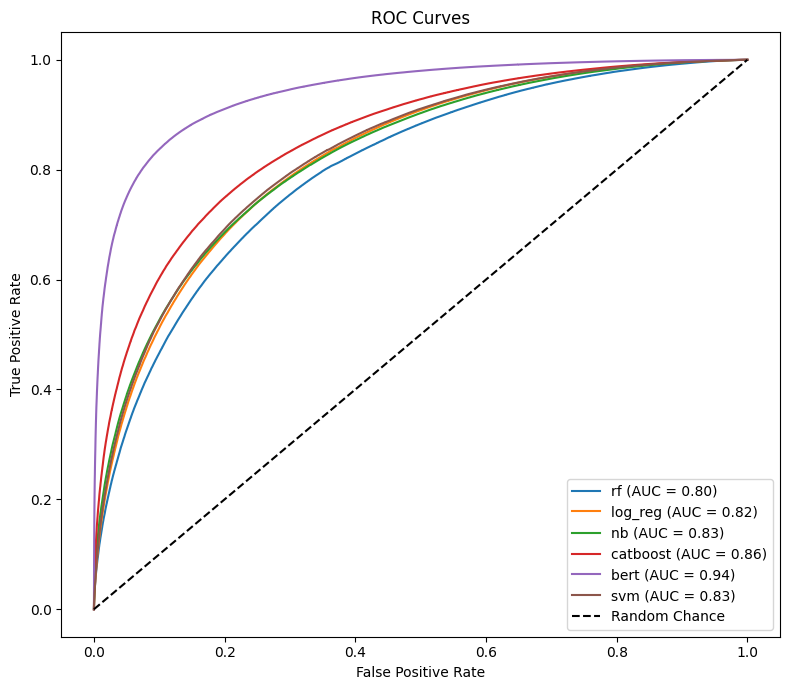

In [1]:
# Overall ROC curve
from tools.viszualizer import plot_summary_roc
import pandas as pd

# Load probabilities
path = "data/predictions/predictions_v2.csv"
predictions = pd.read_csv(path)
print(predictions.columns)
# Plot ROC curve
plt = plot_summary_roc(predictions)
plt.savefig("evaluation_results/results_v2/roc/summary_roc_curve.png")
plt.show()




### Summary ROC Curve:
![image](evaluation_results/results_v2/roc/summary_roc_curve.png)

## Ranking by macro avg F1-score and AUC:

---

**Why macro avg F1-score?**
1) **Balanced evaluation**: Gives equal weight to both classes as there is no preference in avoiding false positives or negatives.
2) **Harmonic mean**: F1-score is the harmonic mean of precision and recall, balancing both metrics.


**Why AUC?**
1) **Discrimination**: Measures how well the model distinguishes between false positives and true positives.
2) **Balanced evaluation**: AUC is less sensitive to class imbalance.

---
Model: F1 (AUC)
1) BERT: 0.824909 (0.94)
2) CatBoost: 0.755431 (0.86)
3) Naive Bayes: 0.734438 (0.83)
4) Support Vector Machine: 0.7332 (0.83)
5) Logistic Regression: 0.729337 (0.82)
6) Random Forest: 0.711349 (0.80)

## Ranking by class recall:
---

**Why recall per class?**
1) Ratio of true positives to actual positives.
2) Indicates how well the model predicts each class.
3) Important for understanding class-specific performance.
4) High recall is means low false negatives.
5) One class recall is proportional to the other class precision.

---

**Negative class**:
1) BERT: 0.934014
2) CatBoost:  0.778372
3) Support Vector Machine: 0.733769
4) Logistic Regression: 0.73032
5) Naive Bayes: 0.66983
6) Random Forest: 0.547812


**Positive class**:
1) Random Forest: 0.859225
2) Naive Bayes: 0.8082
3) BERT: 0.786674
4) CatBoost:  0.770946
5) Support Vector Machine: 0.763877
6) Logistic Regression: 0.759914

---

## Conclusion:
1) **BERT** is the best model for sentiment analysis based on the evaluation -> Accuracy, F1 and AUC -> Expected as BERT is a more advanced model with most generalization capabilities.
2) **CatBoost** is slightly better than classical models, but by less than expected.
3) **Classical models** showed good performance given the simplicity of the models, but still significantly worse than BERT.
4) **Naive Bayes** and **SVM** showed the best performance of the classical models, whereas Naive Bayes is significantly faster to train -> Good choice for simple sentiment analysis tasks.
5) **Random Forest** showed the worst performance overall, but the best positive class recall.

**BERT** is the preferrable model to choose, if **GPU** is available and **computational time** is no concern. 
For **fast** and **simple** sentiment analysis tasks, **Naive Bayes** is the best choice.

---


## Overview of where models were wrong

In [1]:
import pandas as pd
# Path to predicitions
path = "data/predictions/predictions_v2.csv"

# Load predictions
data = pd.read_csv(path)

# Create a counter of total wrong predictions per review
# List of prediction columns 
model_preds = ["rf_pred", "nb_pred", "svm_pred", "log_reg_pred", "catboost_pred", "bert_pred"]

# Count total wrong predictions per review
data["wrong_predictions_count"] = data[model_preds].ne(data["label"], axis=0).sum(axis=1)

# Only keep relevant columns
data = data[["text","token", "label", "wrong_predictions_count"]]

# Sort by wrong predictions count
data = data.sort_values(by="wrong_predictions_count", ascending=False)

# Count how many reviews had a certain amount of wrong predictions
wrong_predictions_count = data["wrong_predictions_count"].value_counts().reset_index()

print(wrong_predictions_count)



   wrong_predictions_count   count
0                        0  717734
1                        1  180945
2                        5  109657
3                        2  102166
4                        3   80993
5                        4   75741
6                        6   58014


**Most** reviews have no wrong predictions (717734), but a total of **58014** reviews have been predicted **wrong by all models**. Next we will have a short look at them to understand why they were predicted wrong.

In [4]:
# Only keep reviews with 6 wrong predictions
wrong_reviews = data[data["wrong_predictions_count"] == 6]

# Show first 10 reviews
print(wrong_reviews.head(10))

                                                     text  \
501825  By the time the excessively boring car chase r...   
638669  Out Of Time is a cop thriller with a great cas...   
309961  Spurlock is still inserting himself into stupi...   
638679  An overly constructed little thriller that squ...   
638678  Dave Collards' script is certainly inventive a...   
887430  Grant's script only hints at a sordid past tha...   
309973  Spurlock is aware that this entire thing could...   
638672      A great way to waste an afternoon or evening.   
309979  I can't exactly recommend the film, but I do r...   
978687  When it's over I can't help feeling as disappo...   

                                                    token  label  \
501825  time excessively boring car chase roll emotion...      1   
638669      time cop thriller great cast trouble feel see      0   
309961  spurlock insert stupid game style situation ti...      1   
638679  overly construct little thriller squeeze fair ..

In [13]:
# Look at a few full reviews and label
for i in range(20):
    print(wrong_reviews.iloc[i]["text"], wrong_reviews.iloc[i]["label"])
    print("------")

By the time the excessively boring car chase rolled around&#44; I had more or less emotionally checked out&#46; It had become apparent that what I valued in the movie wasn&#8217;t what its makers &#8212; director Tom Gormican and his co-writer Kevin Etten &#8212; valued&#46; 1
------
Out Of Time is a cop thriller with a great cast. Trouble is, you may feel as if you've seen it all before. 0
------
Spurlock is still inserting himself into stupid game-show-style situations, but this time his target is so juicy we're inclined to forgive him. 1
------
An overly constructed little thriller that squeezes a fair amount of suspense out of its far-fetched plot. 1
------
Dave Collards' script is certainly inventive and complex but its plot threads quickly unravel as the film goes on and its characters are twisted and pulled into increasingly far-fetched scenarios. 1
------
Grant's script only hints at a sordid past that's never as fleshed out as it needed to be for "12 Hour Shift" to earn the em

**Insights**:
After **manually** reading the first 20 reviews, these are my insights:
1) **Wrong labels**: Some reviews seem to be **mislabelled**. e.g. “By the time the excessively boring car chase... I had more or less emotionally checked out...” labeled positive
2) **Contradictions**: e.g. "For all its dramatic flaws, Zodiac deserves praise for not choosing the easy route" labeled negative
3) **Sarcasm**: e.g. "A great way to waste an afternoon or evening." labeled positive. This could either be a mislabel or sarcasm.
4) **Complexity**: e.g. "When it's over I can't help feeling as disappointed as the cops must have been -- which might actually be a testament to the film's proficiency." labeled positive. This is hard to understand as the feeling of disappointment isnt clear.
5) **Mixed sentiment**: e.g. "I didn't laugh as much as some, but I have to give him credit for continuing to bring a humorous and entertaining viewpoint to non-fiction film with his gimmicky experiments." labeled negative.

---
**Conclusion**:
In  a very large dataset it is **expected** to have **mislabelled** reviews. This could be due to **human error** or **ambiguity** in the review. 
Additionally the **writing style of critics** can be **hard to interpret** for a model, as even I struggle to understand the sentiment of some reviews.
As the labels are binary and extracted from a continuous scale, some reviews may just be **hard to classify** into strictly **positive or negative**.
Given the complexity of some of these reviews the overall model performance is still **impressive**.


---
All models and training results can be obtained using the mlflow ui command in the terminal.
